<a href="https://colab.research.google.com/github/wei-ling-lin/python_1d/blob/main/bakery%20sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**python_1days＿GOGOGO**

🥐 🥯 🍰The dataset of Bakery Sales can be downloaded from kaggle.


---


* 數據集中所對應的詞義

TransactionNo : 每筆交易的唯一標識符

Items : 購買的物品

DateTime : 交易的日期和時間戳

Daypart : 進行交易的一天中的哪一部分（早上，下午，晚上，晚上）

DayType : 分類交易是在周末還是平日進行

In [ ]:
import seaborn as sns
import os
import numpy as np
import pandas as pd #pip install pandas
bakery_data = bkr = pd.read_csv('/content/Bakery.csv')
import matplotlib.pyplot as plt


In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print("列出所有的資料\n",bakery_data)

print("資料的row數:",bakery_data.shape[0]) #總銷售數量為20507筆
print("資料的column數:",bakery_data.shape[1]) 
bkr.info()  #查看資料型態 
print("列出資料的統計信息\n",bkr.describe()) #顯示出資料的各個百分位數、均值、標準差等統計信息
bkr.describe(include=object) #描述資料各個指標的最大值等等。顯示有94個不同的商品

print("資料行與列的轉換\n",bkr.T)

print("查看是否存在空值", bkr.empty)
bkr_Number=bkr['TransactionNo']
from collections import Counter 
print("計算同個人購買的麵包有幾個",Counter(bkr_Number)) #總共有9684名不同顧客的訂單。交易總數

print(bkr['Items'].max()) #傳回字串長度最大的值


bkr_Items = bkr['Items']
new_bkr_Items = '/ '.join(bkr_Items)
new_Items = new_bkr_Items.split("/ ") #轉成list

print(max(new_Items, key=new_Items.count)) #獲取list中出現次數最多的Items。為 'Coffee'
#前十個出現次數最高的Items
from collections import Counter
Items_count = Counter(new_Items)
top_ten = Items_count.most_common(10) 
print(top_ten)


#分別印出每個Items的個數
nulldict={}
for q in new_Items:
    if q not in nulldict.keys():
        nulldict[q] = new_Items.count(q)
print(nulldict)



列出所有的資料
        TransactionNo          Items             DateTime    Daypart  DayType
0                  1          Bread  2016-10-30 09:58:11    Morning  Weekend
1                  2   Scandinavian  2016-10-30 10:05:34    Morning  Weekend
2                  2   Scandinavian  2016-10-30 10:05:34    Morning  Weekend
3                  3  Hot chocolate  2016-10-30 10:07:57    Morning  Weekend
4                  3            Jam  2016-10-30 10:07:57    Morning  Weekend
...              ...            ...                  ...        ...      ...
20502           9682         Coffee  2017-09-04 14:32:58  Afternoon  Weekend
20503           9682            Tea  2017-09-04 14:32:58  Afternoon  Weekend
20504           9683         Coffee  2017-09-04 14:57:06  Afternoon  Weekend
20505           9683         Pastry  2017-09-04 14:57:06  Afternoon  Weekend
20506           9684      Smoothies  2017-09-04 15:04:24  Afternoon  Weekend

[20507 rows x 5 columns]
資料的row數: 20507
資料的column數: 5
<class 'pand

In [ ]:
#把 DateTime分別區分出Year, Month, Week Day, Hour
bkr["Year"]=pd.to_datetime(bkr["DateTime"]).dt.year
bkr["Month"]=pd.to_datetime(bkr["DateTime"]).dt.month
bkr["Week Day"]=pd.to_datetime(bkr["DateTime"]).dt.weekday
bkr["Hour"]=pd.to_datetime(bkr["DateTime"]).dt.hour

In [ ]:
bkr["Month"]=bkr["Month"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('一月','二月' ,'三月' ,'四月' ,'五月' ,'六月' ,'七月' ,'八月' ,'九月','十月' ,'十一月' ,'十二月' ))
#### Replacing the names of the "Week Day"
bkr["Week Day"]=bkr["Week Day"].replace((0,1,2,3,4,5,6),('星期一','星期二' ,'星期三' ,'星期四','星期五' ,'星期六' ,'星期日'))
### Changing hours
bkr["Hour"]=bkr["Hour"].replace((1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23),('1-2點','7-8點','8-9點','9-10點','10-11點','11-12點','12-13點','13-14點','14-15點','15-16點','16-17點','17-18點','18-19點','19-20點','20-21點','21-22點','22-23點','23-24點'))

In [ ]:
bkr

,TransactionNo,Items,DateTime,Daypart,DayType,Year,Month,Week Day,Hour
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016,十月,星期日,9-10點
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,十月,星期日,10-11點
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,十月,星期日,10-11點
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016,十月,星期日,10-11點
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016,十月,星期日,10-11點
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,2017,九月,星期一,14-15點
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,2017,九月,星期一,14-15點
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,2017,九月,星期一,14-15點
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,2017,九月,星期一,14-15點


In [ ]:
pip install matplotlib==3.4.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 4.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, '20 Best-selling Items')

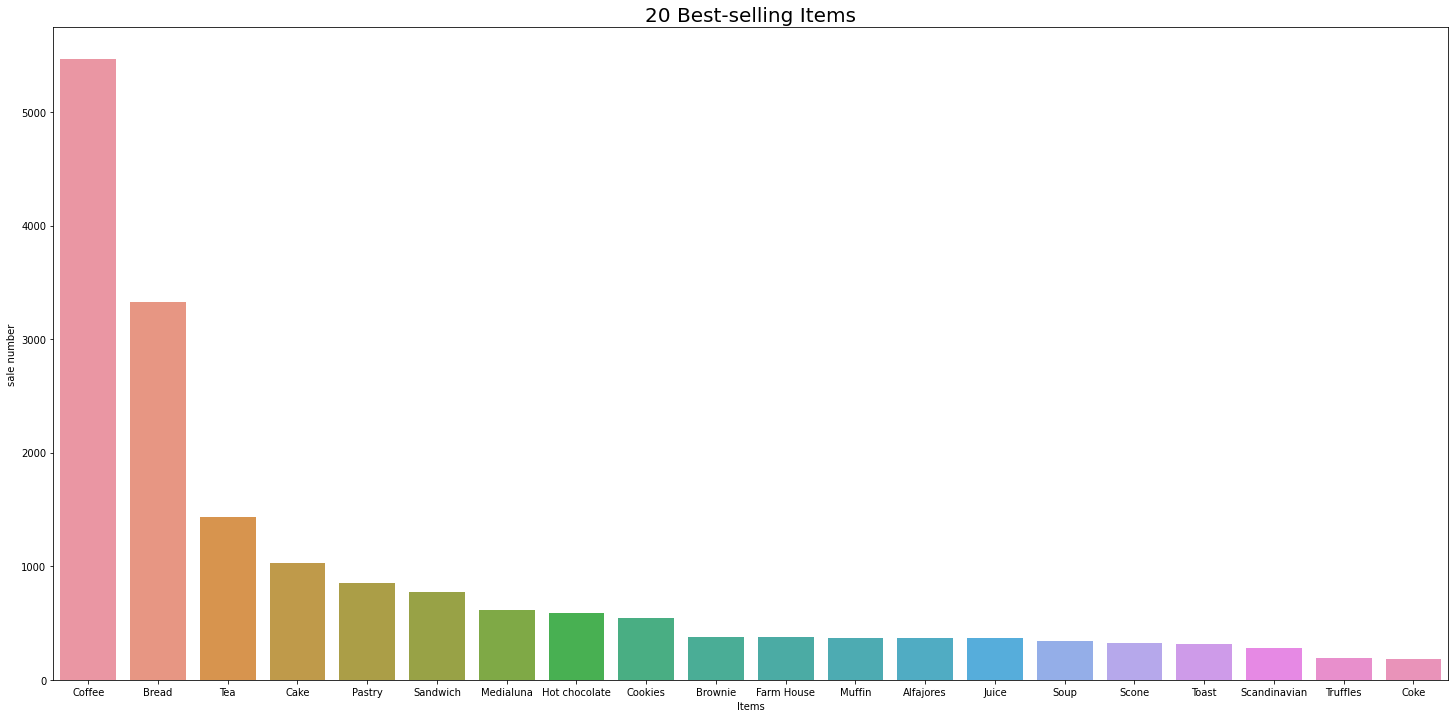

In [ ]:
# 20 best-selling items
best_Items=bkr["Items"].value_counts().head(20).reset_index(name="sale number")
best_Items=best_Items.rename(columns={"index":"Items"})
plt.figure(figsize=(25,12))
colors=sns.color_palette("husl", 20)
ax=sns.barplot(x="Items",y="sale number",data=best_Items)
plt.title("20 Best-selling Items",size=20)



In [ ]:
best_Items

,Items,sale number
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856
5,Sandwich,771
6,Medialuna,616
7,Hot chocolate,590
8,Cookies,540
9,Brownie,379


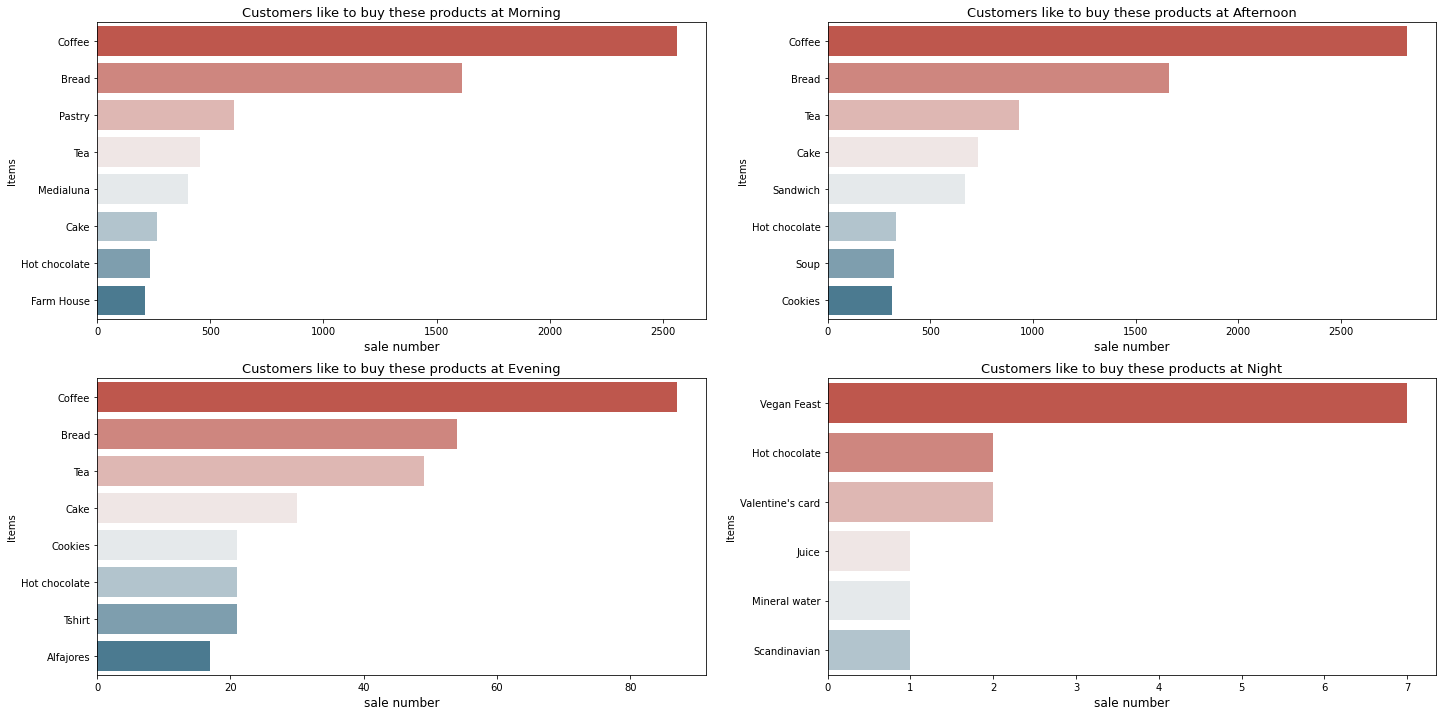

In [ ]:
day_sale = bkr.groupby(["Items","Daypart"])["TransactionNo"].count().reset_index(name="sale number").sort_values(["sale number","Daypart"],ascending=False)
daysspart=['Morning', 'Afternoon', 'Evening', 'Night']

plt.figure(figsize=(24,12))
colors=sns.diverging_palette(15, 230, sep=20, n=8)
for i,j in enumerate(daysspart):
    plt.subplot(2,2,i+1)
    partsdata=day_sale[day_sale["Daypart"]==j].head(8)
    sns.barplot(data=partsdata,x="sale number",y="Items",palette=colors)
    plt.xlabel("sale number",size=12)
    plt.title('Customers like to buy these products at '"{}" .format(j),size=13)





In [ ]:
day_sale


,Daypart,Items,sale number
222,Night,Vegan Feast,7
217,Night,Hot chocolate,2
221,Night,Valentine's card,2
218,Night,Juice,1
219,Night,Mineral water,1
...,...,...,...
41,Afternoon,Hack the stack,1
55,Afternoon,Mortimer,1
60,Afternoon,Olum & polenta,1
64,Afternoon,Polenta,1


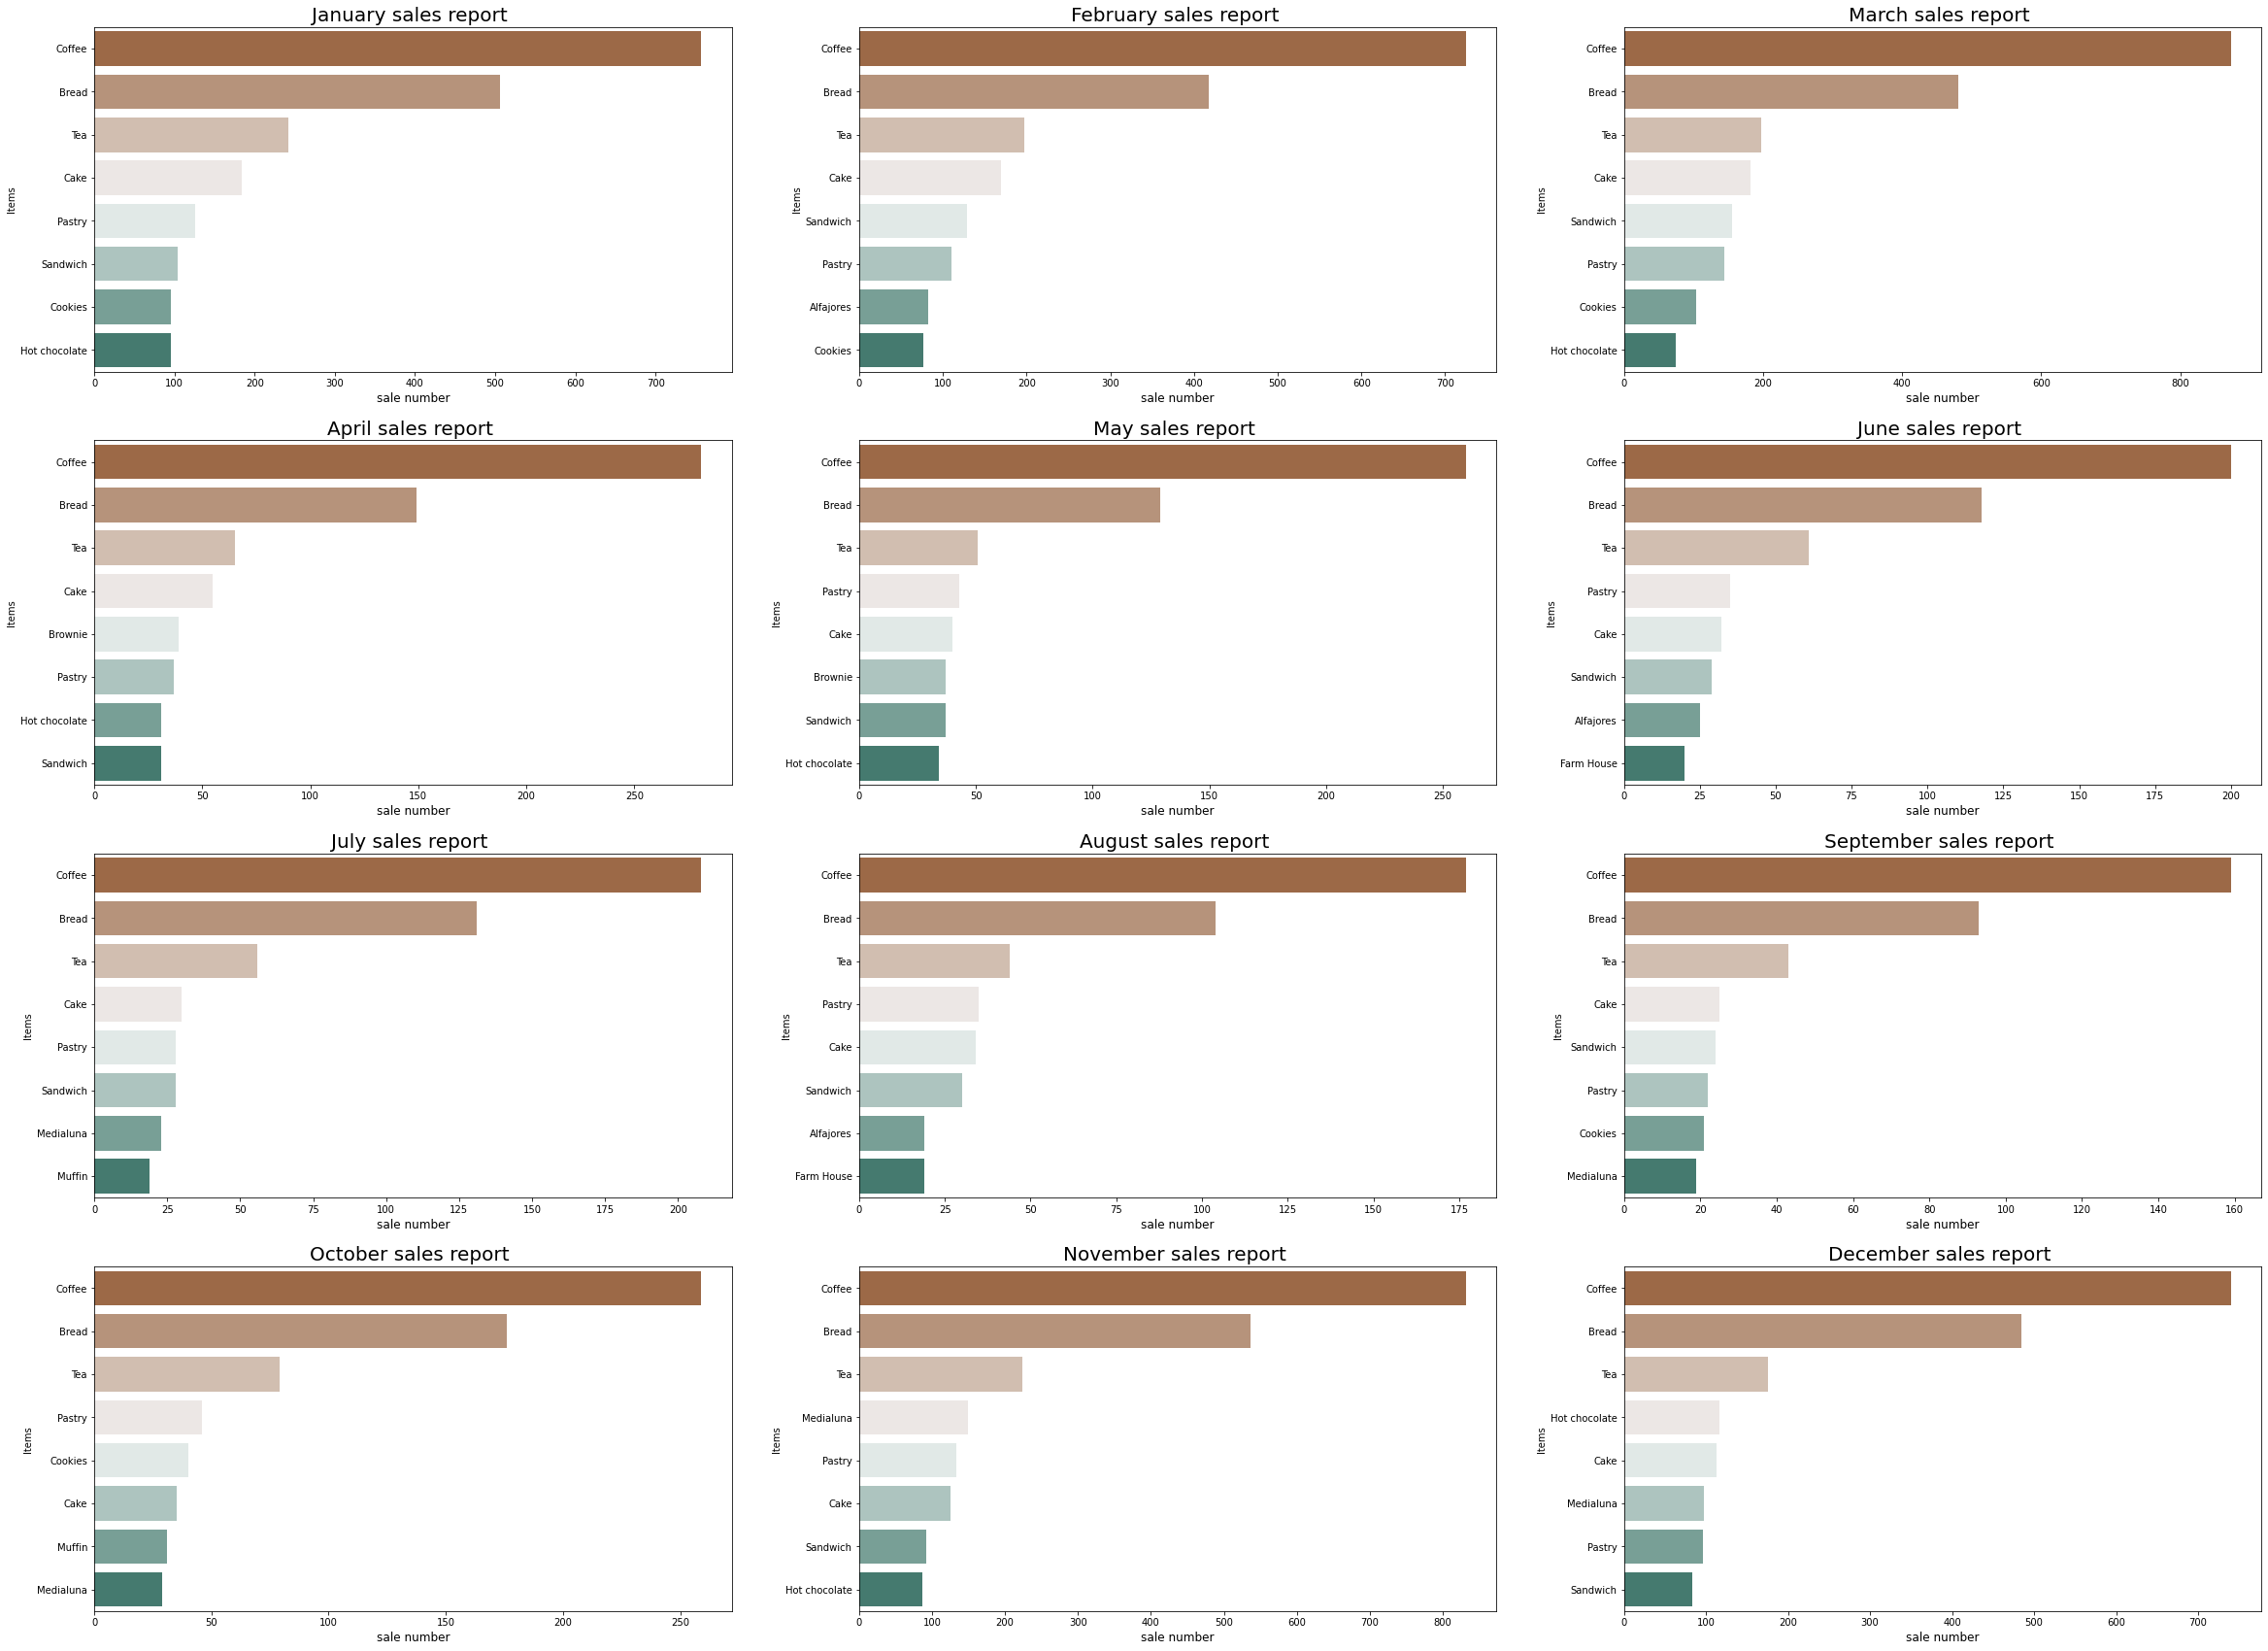

In [ ]:
# Product sales by months
bkr["Month"]=bkr["Month"].replace(('一月','二月' ,'三月' ,'四月' ,'五月' ,'六月' ,'七月' ,'八月' ,'九月','十月' ,'十一月' ,'十二月' ),('January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'))

month_sale = bkr.groupby(["Items","Month"])["TransactionNo"].count().reset_index(name="sale number").sort_values(["sale number","Month"],ascending=False)
monthhpart=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(40,30))
colors=sns.diverging_palette(34, 170, sep=20, n=8)
for i,j in enumerate(monthhpart):
    plt.subplot(4,3,i+1)
    pr=month_sale[month_sale["Month"]==j].head(8)
    sns.barplot(data=pr,x="sale number",y="Items",palette=colors)
    plt.xlabel("sale number",size=12)
    plt.title('{} sales report ' .format(j),size=20)



In [ ]:
month_sale

,Items,Month,sale number
132,Coffee,三月,873
138,Coffee,十一月,832
130,Coffee,一月,757
139,Coffee,十二月,740
134,Coffee,二月,725
...,...,...,...
298,Honey,一月,1
349,Keeping It Local,一月,1
526,Spread,一月,1
602,Valentine's card,一月,1


In [ ]:
bkr

,TransactionNo,Items,DateTime,Daypart,DayType,Year,Month,Week Day,Hour
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016,October,星期日,9-10點
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,October,星期日,10-11點
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,October,星期日,10-11點
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016,October,星期日,10-11點
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016,October,星期日,10-11點
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,2017,September,星期一,14-15點
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,2017,September,星期一,14-15點
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,2017,September,星期一,14-15點
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,2017,September,星期一,14-15點


In [19]:
import plotly.graph_objects as pgo
import plotly.express as pex

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

peaktime = bkr.groupby('Daypart')['Items'].count().sort_values(ascending=False)
fig = pgo.Figure(data=[pgo.Pie(labels=['Afternoon','Morning','Evening','Night'],
                values=peaktime, title="Peak sales time",titlefont=dict(size=18), textinfo='label+percent', marker=dict(colors=pex.colors.sequential.Purp), hole=.42)])
fig.update_layout(margin=dict(t=40, b=40, l=0, r=0), font=dict(size=15), showlegend=False)
fig.show()


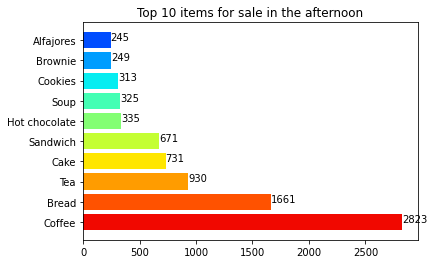

In [ ]:
#plot bar chart
DayAfternoon = bkr['Daypart'] =='Afternoon'
bkr_Afternoon=bkr[DayAfternoon] #只留下Afternoon這個時間對應的數據

bestAfternoon_Items=bkr_Afternoon["Items"].value_counts().head(10).reset_index(name="sale number") #在下午的這段時間中銷售前十名的商品

index = bestAfternoon_Items['index']

sale_number = bestAfternoon_Items['sale number']

x = np.arange(len(index))
colormb = cm.jet(np.linspace(0.9,0.2,len(index)))
plt.barh(x, sale_number, color=colormb )
plt.yticks(x, index)
plt.title('Top 10 items for sale in the afternoon')
for a, b in enumerate(sale_number):
    plt.text(b, a,
             str(b))

